In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from psi import calculate_psi


In [2]:
from keras.models import load_model
model_final = load_model('../models/final/ann_final_test_sort.h5')


In [3]:
ft_march = pd.read_parquet("../data/features_march.parquet")

In [4]:
ft_march

,accountid,amount_sum_7d,amount_sum_14d,amount_sum_21d,amount_prev_0,amount_prev_1,amount_prev_2,amount_prev_3,amount_prev_4,amount_prev_5,...,activity_days_prev_5,activity_days_prev_6,activity_days_prev_7,activity_days_prev_8,activity_days_prev_9,activity_days_prev_10,activity_days_prev_11,year,month,day
3226,7486609c296ae597f9,0.0,48.9,0.0,48.90,0.00,0.0,0.0,0.0,0.00,...,0,0,0,0,0,0,0,2021,3,3
1497,748665962c6ee494fe,1005.0,777.0,0.0,1782.00,0.00,0.0,0.0,0.0,0.00,...,0,0,0,0,0,0,0,2021,3,3
1498,748665972866e498fd,0.0,0.0,0.0,0.00,110.00,0.0,0.0,0.0,0.00,...,0,0,0,0,1,2,1,2021,3,3
1499,748665972869e797fd,244.4,163.8,22.9,502.20,611.54,311.5,374.4,201.0,393.22,...,6,11,9,8,11,9,5,2021,3,3
1500,74866597286de092fe,11.0,0.0,0.0,11.00,1000.00,0.0,1.0,0.0,0.00,...,0,0,0,0,0,0,0,2021,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,7486649b206ce391f9,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,5.00,...,1,1,0,3,0,0,0,2021,3,31
2009,7486649b2068e790fc,37.0,145.0,437.0,968.00,668.30,904.9,204.1,125.5,0.00,...,0,0,0,0,0,0,0,2021,3,31
2008,7486649a2e68ec93fc,7.0,0.0,0.0,7.00,0.00,0.0,29.0,0.0,0.00,...,0,0,0,0,0,0,0,2021,3,31
2006,7486649a2b69e797fe,416.1,313.7,369.7,1548.26,2637.50,874.1,0.0,0.0,0.00,...,0,0,0,0,0,0,0,2021,3,31


In [4]:
from pickle import load
scaler = load(open('../models/final/scaler.pkl', 'rb'))

# Probabilidades con ANN

In [7]:
columns = ['activity_days_7', 'activity_days_14', 'activity_days_15',
       'activity_days_21', 'activity_days_prev_0', 'activity_days_prev_1',
       'activity_days_prev_2', 'activity_days_prev_3', 'activity_days_prev_4',
       'activity_days_prev_5', 'activity_days_prev_6', 'activity_days_prev_7',
       'activity_days_prev_8', 'activity_days_prev_9', 'activity_days_prev_10',
       'amount_sum_7d', 'txamount_sum_14d_period',
       'txamount_sum_15d_period', 'txamount_sum_21d_period',
       'txamount_sum_22d_period', 'txamount_sum_30d_period',
       'txamount_sum_38d_period', 'txamount_sum_45d_period',
       'txamount_sum_52d_period', 'txamount_sum_60d_period',
       'txamount_sum_68d_period', 'txamount_sum_75d_period',
       'txamount_sum_82d_period', 'txamount_sum_90d_period', 'amount_prev_0',
       'amount_prev_1', 'amount_prev_2', 'amount_prev_3', 'amount_prev_4',
       'amount_prev_5', 'amount_prev_6', 'amount_prev_7', 'amount_prev_8',
       'amount_prev_9', 'amount_prev_10','quantity_sum_7d',
       'txquantity_sum_14d_period', 'txquantity_sum_21d_period',
       'txquantity_sum_30d_period', 'quantity_prev_0', 'quantity_prev_1',
       'quantity_prev_2', 'quantity_prev_3', 'quantity_prev_4',
       'quantity_prev_5', 'quantity_prev_6', 'quantity_prev_7',
       'quantity_prev_8', 'quantity_prev_9', 'quantity_prev_10', 'accountid']

In [8]:
days=ft_march.day.unique()

In [17]:
preds_all=pd.DataFrame()
for i in days:
    X= ft_march.loc[ft_march.day==i,columns]
    X = X.set_index('accountid')
    X.index = X.index.astype(str)
    if (i==3):
        preds_all = pd.Series(model_final.predict(
                    scaler.transform(X)
                )[:, 0],
                index=X.index
            ).to_frame(name=3)
    else:
        preds_all[i] = pd.Series(model_final.predict(
                    scaler.transform(X)
                )[:, 0],
                index=X.index
            ).to_frame(name='prob'+str(i))


In [20]:
preds_all.columns = ['prob_'+str(i) for i in days]

In [72]:
preds_all.dropna(inplace=True)
preds_all

,prob_3,prob_18,prob_24,prob_31
accountid,,,,
7486609c296ae597f9,0.672196,0.679537,0.679537,0.678746
748665962c6ee494fe,0.544130,0.626798,0.620236,0.675463
748665972866e498fd,0.678817,0.675853,0.672057,0.673409
748665972869e797fd,0.651455,0.582143,0.508420,0.693711
74866597286de092fe,0.637654,0.667616,0.625957,0.627693
...,...,...,...,...
748660992068e499fc,0.667789,0.667789,0.667789,0.687337
748660992868e791fc,0.620364,0.627775,0.634445,0.632238
74866099286be298ff,0.675014,0.674195,0.674195,0.674195


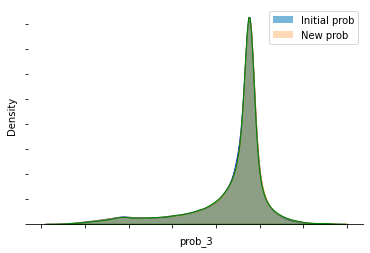

In [73]:
import matplotlib.patches as  mpatches

plot = sns.kdeplot(preds_all["prob_3"], shade=True,color="blue")
plot = sns.kdeplot(preds_all["prob_18"], shade=True,color="orange")
plot = sns.kdeplot(preds_all["prob_24"], shade=True,color="gray")
plot = sns.kdeplot(preds_all["prob_31"], shade=True,color="green")

plot.set(yticklabels=[], xticklabels = [])
sns.despine(left=True)


handles = [mpatches.Patch(facecolor=plt.cm.Blues(120), label="Initial prob"),
           mpatches.Patch(facecolor=plt.cm.Oranges(50), label="New prob")]
plot.legend(handles=handles)

In [74]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from psi import calculate_psi

In [75]:
calculate_psi(preds_all["prob_3"], preds_all["prob_18"], buckettype='quantiles', buckets=10, axis=1)

0.001803614645584384

In [76]:
buckets = 10
breakpoints = np.stack([np.percentile(preds_all["prob_3"], b) for b in np.arange(0, buckets + 1) / (buckets) * 100])
breakpoints

array([0.23612094, 0.50419576, 0.59829707, 0.63799389, 0.65711799,
       0.66890621, 0.67414548, 0.67769969, 0.68216172, 0.69675731,
       0.86650634])

In [77]:
initial_counts = np.histogram(preds_all["prob_3"], breakpoints)[0]
new_counts_18 = np.histogram(preds_all["prob_18"], breakpoints)[0]
new_counts_24 = np.histogram(preds_all["prob_24"], breakpoints)[0]
new_counts_31 = np.histogram(preds_all["prob_31"], breakpoints)[0]

In [78]:
initial_counts

array([11207, 11207, 11207, 11206, 11207, 11207, 11173, 11240, 11207,
       11207])

In [79]:
df = pd.DataFrame({'Bucket': np.arange(1, 11), 'Breakpoint Value':breakpoints[1:], 'Initial Count':initial_counts, 
                  'New Count_18':new_counts_18,'New Count_24':new_counts_24,'New Count_31':new_counts_31})
df['Initial Percent'] = df['Initial Count'] / len(preds_all["prob_3"])

df['New Percent_18'] = df['New Count_18'] / len(preds_all["prob_18"])
df['New Percent_18'][df['New Percent_18'] == 0] = 0.001

df['New Percent_24'] = df['New Count_24'] / len(preds_all["prob_24"])
df['New Percent_24'][df['New Percent_24'] == 0] = 0.001

df['New Percent_31'] = df['New Count_31'] / len(preds_all["prob_31"])
df['New Percent_31'][df['New Percent_31'] == 0] = 0.001


percents = df[['Initial Percent', 'New Percent_18','New Percent_24','New Percent_31', 'Bucket']] \
             .melt(id_vars=['Bucket']) \
             .rename(columns={'variable':'Population', 'value':'Percent'})

<ipython-input-79-21630bf27955>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Percent_18'][df['New Percent_18'] == 0] = 0.001
<ipython-input-79-21630bf27955>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Percent_24'][df['New Percent_24'] == 0] = 0.001
<ipython-input-79-21630bf27955>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Percent_31'][df['New Percent_31'] == 0] = 0.001


[(0.0, 0.2)]

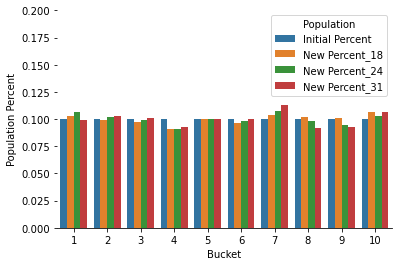

In [80]:
p = sns.barplot(x="Bucket", y="Percent", hue="Population", data=percents)
p.set(xlabel='Bucket', ylabel='Population Percent')
sns.despine(left=True)
p.set(ylim=(0, 0.2))

In [66]:
print("week_1",calculate_psi(preds_all["prob_3"], preds_all["prob_18"], buckettype='quantiles', buckets=10, axis=1))
print("week_2",calculate_psi(preds_all["prob_3"], preds_all["prob_24"], buckettype='quantiles', buckets=10, axis=1))
print("week_3",calculate_psi(preds_all["prob_3"], preds_all["prob_31"], buckettype='quantiles', buckets=10, axis=1))

week_1 0.045970623637894295
week_2 0.0453596464600584
week_3 0.04338320217351154


# PCA SVM

In [90]:
import joblib as jb
pcasvm = jb.load("../models/final/pcasvm_test.pkl")

In [91]:
preds_all_1=pd.DataFrame()
for i in days:
    X= ft_march.loc[ft_march.day==i,columns]
    X = X.set_index('accountid')
    X.index = X.index.astype(str)
    if (i==3):
        preds_all_1 = pd.Series(pcasvm.predict_proba(
                    X
                )[:, 1],
                index=X.index
            ).to_frame(name=3)
    else:
        preds_all_1[i] = pd.Series(pcasvm.predict_proba(
                    X
                )[:, 1],
                index=X.index
            ).to_frame(name='prob'+str(i))
preds_all_1.columns = ['prob_'+str(i) for i in days]

In [92]:
preds_all_1.dropna(inplace=True)

In [93]:
buckets = 10
breakpoints = np.stack([np.percentile(preds_all_1["prob_3"], b) for b in np.arange(0, buckets + 1) / (buckets) * 100])
breakpoints

array([0.01633222, 0.55471015, 0.78747206, 0.79074656, 0.79184124,
       0.79406856, 0.79912397, 0.80651271, 0.81851274, 0.83681779,
       0.948869  ])

In [94]:
initial_counts = np.histogram(preds_all_1["prob_3"], breakpoints)[0]
new_counts_18 = np.histogram(preds_all_1["prob_18"], breakpoints)[0]
new_counts_24 = np.histogram(preds_all_1["prob_24"], breakpoints)[0]
new_counts_31 = np.histogram(preds_all_1["prob_31"], breakpoints)[0]

In [95]:
initial_counts

array([11207, 11207, 11207, 11206, 11207, 11207, 11206, 11207, 11207,
       11207])

In [96]:
df = pd.DataFrame({'Bucket': np.arange(1, 11), 'Breakpoint Value':breakpoints[1:], 'Initial Count':initial_counts, 
                  'New Count_18':new_counts_18,'New Count_24':new_counts_24,'New Count_31':new_counts_31})
df['Initial Percent'] = df['Initial Count'] / len(preds_all_1["prob_3"])

df['New Percent_18'] = df['New Count_18'] / len(preds_all_1["prob_18"])
df['New Percent_18'][df['New Percent_18'] == 0] = 0.001

df['New Percent_24'] = df['New Count_24'] / len(preds_all_1["prob_24"])
df['New Percent_24'][df['New Percent_24'] == 0] = 0.001

df['New Percent_31'] = df['New Count_31'] / len(preds_all_1["prob_31"])
df['New Percent_31'][df['New Percent_31'] == 0] = 0.001


percents = df[['Initial Percent', 'New Percent_18','New Percent_24','New Percent_31', 'Bucket']] \
             .melt(id_vars=['Bucket']) \
             .rename(columns={'variable':'Population', 'value':'Percent'})

<ipython-input-96-176adc85f47b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Percent_18'][df['New Percent_18'] == 0] = 0.001
<ipython-input-96-176adc85f47b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Percent_24'][df['New Percent_24'] == 0] = 0.001
<ipython-input-96-176adc85f47b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Percent_31'][df['New Percent_31'] == 0] = 0.001


[(0.0, 0.2)]

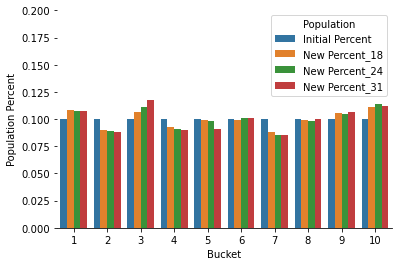

In [97]:
p = sns.barplot(x="Bucket", y="Percent", hue="Population", data=percents)
p.set(xlabel='Bucket', ylabel='Population Percent')
sns.despine(left=True)
p.set(ylim=(0, 0.2))

In [98]:
print("week_1",calculate_psi(preds_all_1["prob_3"], preds_all_1["prob_18"], buckettype='quantiles', buckets=10, axis=1))
print("week_2",calculate_psi(preds_all_1["prob_3"], preds_all_1["prob_24"], buckettype='quantiles', buckets=10, axis=1))
print("week_3",calculate_psi(preds_all_1["prob_3"], preds_all_1["prob_31"], buckettype='quantiles', buckets=10, axis=1))

week_1 0.005518660653671643
week_2 0.008353054028282151
week_3 0.010767847448397701
